# USS Theodore Roosevelt COVID-19 Time Series

A time series of confirmed COVID-19 cases in a population of sailors from the USS Theodore Roosevelt,
currently docked in Guam, is being maintained at:
https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_on_USS_Theodore_Roosevelt

Source data this time time series comes from:
https://navylive.dodlive.mil/2020/03/15/u-s-navy-covid-19-updates/

According to this source:

2020-04-23 19:00 ChST: "As of today, 99% of USS Theodore Roosevelt (CVN 71) crewmembers have been tested for COVID-19, with 777 total positive and 3,919 negative results.  Of the total positive cases, 63 Sailors have recovered. 4,196 Sailors have moved ashore."

2020-04-24 07:00 ChST: "As of today, 100% of USS Theodore Roosevelt (CVN 71) crewmembers have been tested for COVID-19, with 840 total positive and 4,098 negative results (a small number of results are still pending). Of the total cases, 88 Sailors have recovered, and 4,234 Sailors have moved ashore."

The code below downloads data from the Wikipedia page and plots them with the rest of the Guam cases.

In [10]:
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [11]:
def download_roosevelt_timeseries():
    url = 'https://en.wikipedia.org/w/index.php?title=2020_coronavirus_pandemic_on_USS_Theodore_Roosevelt&action=edit&section=7'

    r = requests.get(url)

    dates = re.findall('\|x=(.*)\n', r.text)[0].split(',')
    dates = [date.strip() for date in dates]
    for i, date in enumerate(dates):
        dates[i] = '{} 2020'.format(date)

    cases = re.findall('\|y1=(.*)\&', r.text)[0].split(',')
    cases = [case.strip() for case in cases]
    for i, case in enumerate(cases):
        if case == '':
            cases[i] = cases[i-1]
        else:
            cases[i] = int(case)
    cases

    df = pd.DataFrame({'cases':cases}, index=dates)
    df.index = pd.to_datetime(df.index) # Converting index from string to date
    df.to_csv('Roosevelt.csv')
    return

In [12]:
def get_data(place_name):
    """
    Reads a csv file containing 2 columns, date and cases.
    Adds a new column, days
    Returns a dataframe
    """
    filename = place_name + '.csv'
    df = pd.read_csv(filename, index_col=0)
    df['days'] = range(0, df.size)
    return df

# MAIN

In [13]:
# Download the data from the Wikipedia page and save it as Roosevelt.csv
download_roosevelt_timeseries()

# Read CSV files for the Roosevelt and the rest of Guam
dfRoosevelt = get_data('Roosevelt')
dfGuam = get_data('Guam')

# Merge the dataframes
dfmerged = dfGuam.merge(right=dfRoosevelt,how='outer', left_index=True, right_index=True, )
dfmerged = dfmerged.rename(columns={'cases_x':'Guam residents', 'cases_y':'USS Roosevelt sailors'})
dfmerged

,Guam residents,days_x,USS Roosevelt sailors,days_y
2020-03-16,3.0,0.0,NaN,NaN
2020-03-17,3.0,1.0,NaN,NaN
2020-03-18,5.0,2.0,NaN,NaN
2020-03-19,12.0,3.0,NaN,NaN
2020-03-20,14.0,4.0,NaN,NaN
2020-03-21,15.0,5.0,NaN,NaN
2020-03-22,27.0,6.0,NaN,NaN
2020-03-23,29.0,7.0,3.0,0.0
2020-03-24,32.0,8.0,8.0,1.0
2020-03-25,37.0,9.0,8.0,2.0


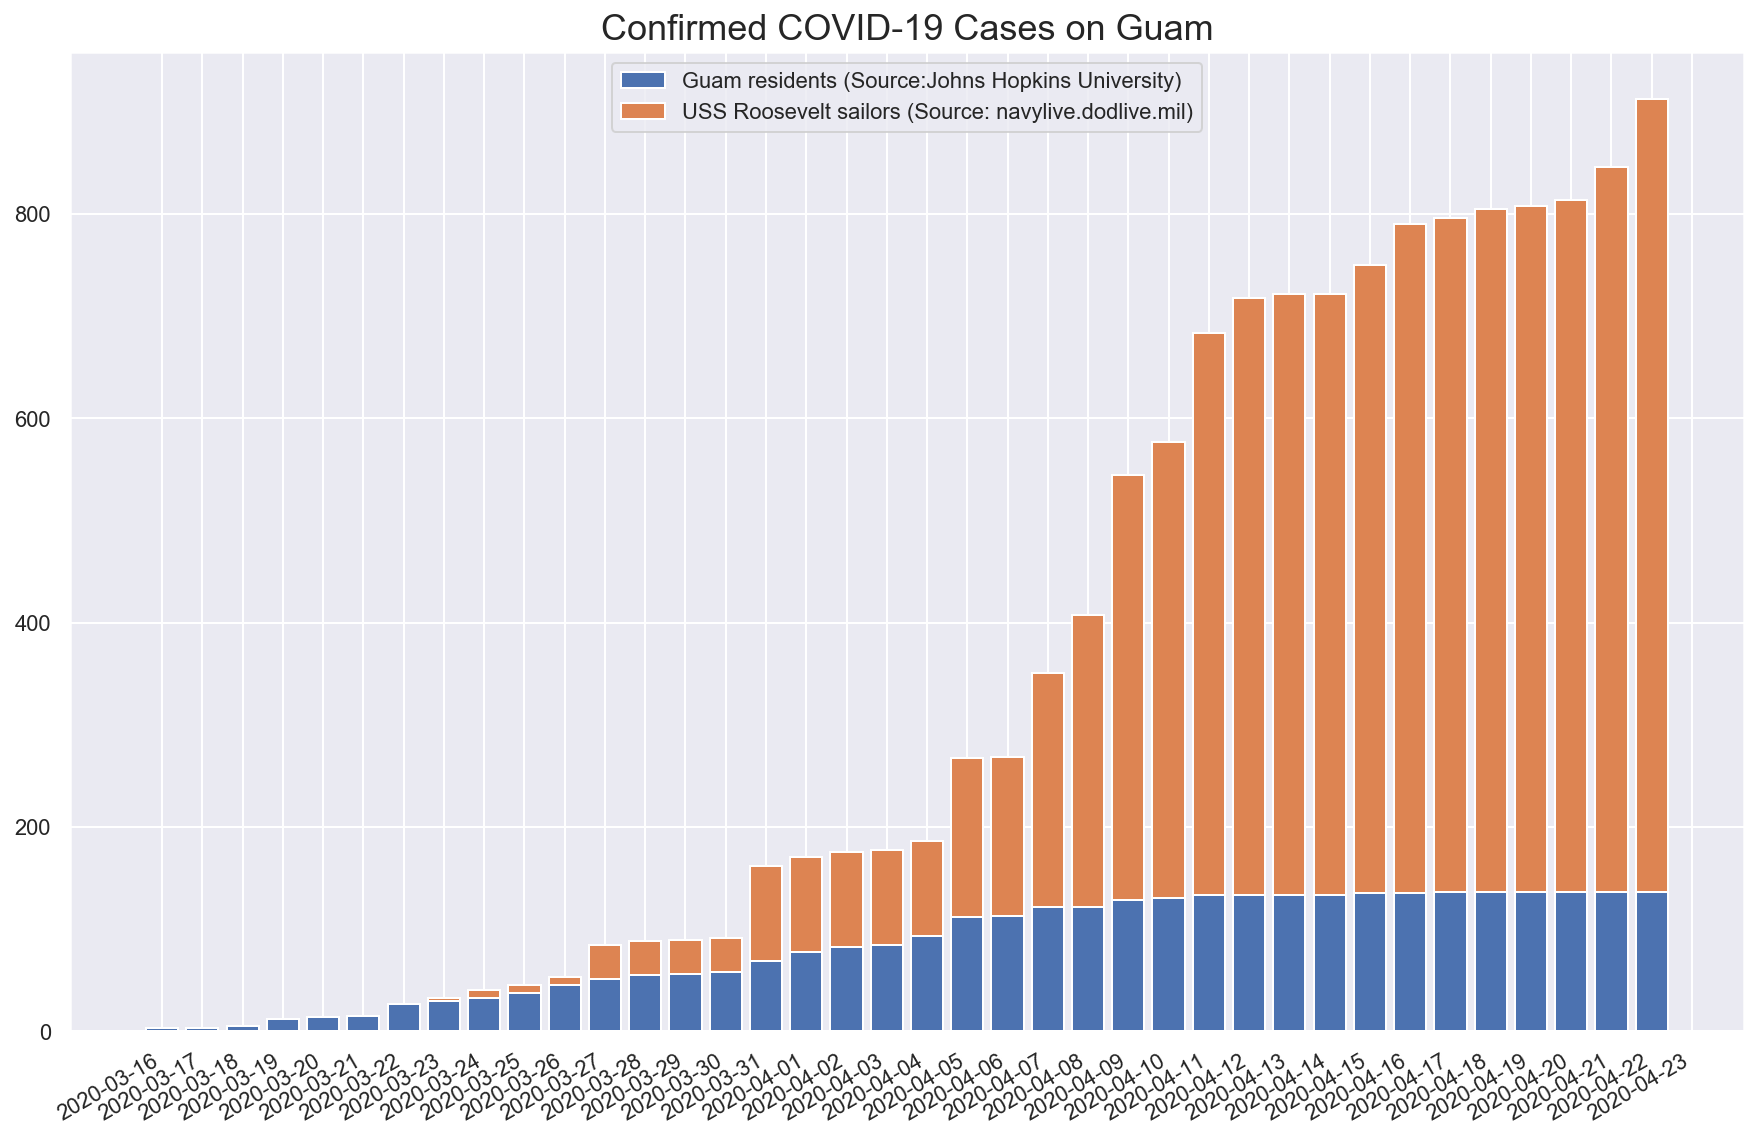

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(dfmerged.index, dfmerged['Guam residents'], 
       label = 'Guam residents (Source:Johns Hopkins University)')
ax.bar(dfmerged.index, dfmerged['USS Roosevelt sailors'], 
       label='USS Roosevelt sailors (Source: navylive.dodlive.mil)',
       bottom=dfmerged['Guam residents'])
ax.set_title('Confirmed COVID-19 Cases on Guam')
ax.legend()
fig.autofmt_xdate()
plt.savefig('images/GuamRoosevelt.png')
plt.show()